# Importing libraries and dataset

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing data from the ipl2017 dataset
df = pd.read_csv('C:\\Users\\saiki\\Downloads\ipl2017.csv')

In [2]:
df = pd.read_csv("C:\\Users\\RASAGNA\\ipl2017.csv")

# Exploring the dataset

In [3]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [4]:
df.shape

(76014, 15)

In [5]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [6]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# Data Cleaning

In [7]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [8]:
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [9]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [10]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [11]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [12]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [13]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [14]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [15]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [16]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [17]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


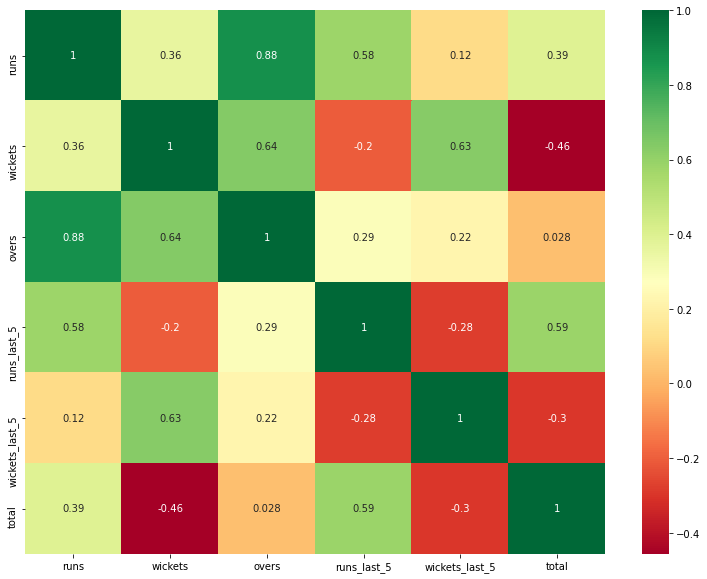

In [18]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# one-hot encoding

### Convert the categorical string columns to numerical columns, by using one-hot encoding

In [19]:
df.dtypes

date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

In [20]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['bat_team']= le.fit_transform(df['bat_team']) 
df['bowl_team']= le.fit_transform(df['bowl_team']) 
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,3,6,61,0,5.1,59,0,222
33,2008-04-18,3,6,61,1,5.2,59,1,222
34,2008-04-18,3,6,61,1,5.3,59,1,222
35,2008-04-18,3,6,61,1,5.4,59,1,222
36,2008-04-18,3,6,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,3,4,106,9,18.1,29,4,107
75885,2017-05-19,3,4,107,9,18.2,29,4,107
75886,2017-05-19,3,4,107,9,18.3,28,4,107
75887,2017-05-19,3,4,107,9,18.4,24,4,107


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bat_team column (label encoded values of bat_team)
enc_df = pd.DataFrame(enc.fit_transform(df[['bat_team']]).toarray())
# merge
df = df.join(enc_df)
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,0,1,2,3,4,5,6,7
32,2008-04-18,3,6,61,0,5.1,59,0,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33,2008-04-18,3,6,61,1,5.2,59,1,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34,2008-04-18,3,6,61,1,5.3,59,1,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35,2008-04-18,3,6,61,1,5.4,59,1,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36,2008-04-18,3,6,61,1,5.5,58,1,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,3,4,106,9,18.1,29,4,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75885,2017-05-19,3,4,107,9,18.2,29,4,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75886,2017-05-19,3,4,107,9,18.3,28,4,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75887,2017-05-19,3,4,107,9,18.4,24,4,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df=df.dropna()
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,0,1,2,3,4,5,6,7
32,2008-04-18,3,6,61,0,5.1,59,0,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33,2008-04-18,3,6,61,1,5.2,59,1,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34,2008-04-18,3,6,61,1,5.3,59,1,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35,2008-04-18,3,6,61,1,5.4,59,1,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36,2008-04-18,3,6,61,1,5.5,58,1,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40005,2013-04-11,3,6,149,7,19.2,39,4,154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40006,2013-04-11,3,6,149,8,19.3,38,5,154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40007,2013-04-11,3,6,150,8,19.4,38,5,154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40008,2013-04-11,3,6,150,8,19.5,37,5,154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
df = df.rename(columns = {0:"bat_CSK"}) 
df = df.rename(columns = {1:"bat_DD"})
df = df.rename(columns = {2:"bat_KIXP"})
df = df.rename(columns = {3:"bat_KKR"})
df = df.rename(columns = {4:"bat_MI"})
df = df.rename(columns = {5:"bat_RR"})
df = df.rename(columns = {6:"bat_RCB"})
df = df.rename(columns = {7:"bat_SH"})
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_CSK,bat_DD,bat_KIXP,bat_KKR,bat_MI,bat_RR,bat_RCB,bat_SH
32,2008-04-18,3,6,61,0,5.1,59,0,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33,2008-04-18,3,6,61,1,5.2,59,1,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34,2008-04-18,3,6,61,1,5.3,59,1,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35,2008-04-18,3,6,61,1,5.4,59,1,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36,2008-04-18,3,6,61,1,5.5,58,1,222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40005,2013-04-11,3,6,149,7,19.2,39,4,154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40006,2013-04-11,3,6,149,8,19.3,38,5,154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40007,2013-04-11,3,6,150,8,19.4,38,5,154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40008,2013-04-11,3,6,150,8,19.5,37,5,154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bowl_team column (label encoded values of bowl_team)
enc_df = pd.DataFrame(enc.fit_transform(df[['bowl_team']]).toarray())
# merge
df = df.join(enc_df)
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_CSK,...,bat_RCB,bat_SH,0,1,2,3,4,5,6,7
32,2008-04-18,3,6,61,0,5.1,59,0,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,2008-04-18,3,6,61,1,5.2,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34,2008-04-18,3,6,61,1,5.3,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,2008-04-18,3,6,61,1,5.4,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36,2008-04-18,3,6,61,1,5.5,58,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40005,2013-04-11,3,6,149,7,19.2,39,4,154,0.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40006,2013-04-11,3,6,149,8,19.3,38,5,154,0.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40007,2013-04-11,3,6,150,8,19.4,38,5,154,0.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40008,2013-04-11,3,6,150,8,19.5,37,5,154,0.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df=df.dropna()
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_CSK,...,bat_RCB,bat_SH,0,1,2,3,4,5,6,7
32,2008-04-18,3,6,61,0,5.1,59,0,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,2008-04-18,3,6,61,1,5.2,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34,2008-04-18,3,6,61,1,5.3,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,2008-04-18,3,6,61,1,5.4,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36,2008-04-18,3,6,61,1,5.5,58,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,2010-04-13,4,1,90,2,12.4,34,1,183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19422,2010-04-13,4,1,91,2,12.5,35,1,183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19423,2010-04-13,4,1,92,2,12.6,35,1,183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19424,2010-04-13,4,1,92,2,13.1,33,1,183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
df = df.rename(columns = {0:"bowl_CSK"}) 
df = df.rename(columns = {1:"bowl_DD"})
df = df.rename(columns = {2:"bowl_KIXP"})
df = df.rename(columns = {3:"bowl_KKR"})
df = df.rename(columns = {4:"bowl_MI"})
df = df.rename(columns = {5:"bowl_RR"})
df = df.rename(columns = {6:"bowl_RCB"})
df = df.rename(columns = {7:"bowl_SH"})
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_CSK,...,bat_RCB,bat_SH,bowl_CSK,bowl_DD,bowl_KIXP,bowl_KKR,bowl_MI,bowl_RR,bowl_RCB,bowl_SH
32,2008-04-18,3,6,61,0,5.1,59,0,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,2008-04-18,3,6,61,1,5.2,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34,2008-04-18,3,6,61,1,5.3,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,2008-04-18,3,6,61,1,5.4,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36,2008-04-18,3,6,61,1,5.5,58,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,2010-04-13,4,1,90,2,12.4,34,1,183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19422,2010-04-13,4,1,91,2,12.5,35,1,183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19423,2010-04-13,4,1,92,2,12.6,35,1,183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19424,2010-04-13,4,1,92,2,13.1,33,1,183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_CSK,...,bat_RCB,bat_SH,bowl_CSK,bowl_DD,bowl_KIXP,bowl_KKR,bowl_MI,bowl_RR,bowl_RCB,bowl_SH
32,2008-04-18,3,6,61,0,5.1,59,0,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,2008-04-18,3,6,61,1,5.2,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34,2008-04-18,3,6,61,1,5.3,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,2008-04-18,3,6,61,1,5.4,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36,2008-04-18,3,6,61,1,5.5,58,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
# converting datetime to int
df['date']=df['date'].dt.strftime("%Y%m%d").astype(int)

In [29]:
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_CSK,...,bat_RCB,bat_SH,bowl_CSK,bowl_DD,bowl_KIXP,bowl_KKR,bowl_MI,bowl_RR,bowl_RCB,bowl_SH
32,20080418,3,6,61,0,5.1,59,0,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,20080418,3,6,61,1,5.2,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34,20080418,3,6,61,1,5.3,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,20080418,3,6,61,1,5.4,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36,20080418,3,6,61,1,5.5,58,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,20100413,4,1,90,2,12.4,34,1,183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19422,20100413,4,1,91,2,12.5,35,1,183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19423,20100413,4,1,92,2,12.6,35,1,183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19424,20100413,4,1,92,2,13.1,33,1,183,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
df.dtypes

date                int32
bat_team            int32
bowl_team           int32
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
total               int64
bat_CSK           float64
bat_DD            float64
bat_KIXP          float64
bat_KKR           float64
bat_MI            float64
bat_RR            float64
bat_RCB           float64
bat_SH            float64
bowl_CSK          float64
bowl_DD           float64
bowl_KIXP         float64
bowl_KKR          float64
bowl_MI           float64
bowl_RR           float64
bowl_RCB          float64
bowl_SH           float64
dtype: object

#  Features Scalling 

In [31]:
import numpy as np 

import matplotlib.pyplot as plt 

import pandas as pd 

  
# Sklearn library  

from sklearn import preprocessing 

In [32]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_CSK,...,bat_RCB,bat_SH,bowl_CSK,bowl_DD,bowl_KIXP,bowl_KKR,bowl_MI,bowl_RR,bowl_RCB,bowl_SH
32,20080418,3,6,61,0,5.1,59,0,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,20080418,3,6,61,1,5.2,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34,20080418,3,6,61,1,5.3,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,20080418,3,6,61,1,5.4,59,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36,20080418,3,6,61,1,5.5,58,1,222,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
  
# here Features  
# are taken using slicing 
# to handle values with varying magnitude 

x = df.iloc[:, 1:3].values 

print ("\nOriginal data values : \n",  x) 


Original data values : 
 [[3 6]
 [3 6]
 [3 6]
 ...
 [4 1]
 [4 1]
 [4 1]]


In [34]:
from sklearn import preprocessing 

""" MIN MAX SCALER """

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 

  
# Scaled feature 

x_after_min_max_scaler = min_max_scaler.fit_transform(x) 

  

print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 

  


After min max Scaling : 
 [[0.5        1.        ]
 [0.5        1.        ]
 [0.5        1.        ]
 ...
 [0.66666667 0.16666667]
 [0.66666667 0.16666667]
 [0.66666667 0.16666667]]


In [35]:
  
""" Standardisation """

  

Standardisation = preprocessing.StandardScaler() 

  
# Scaled feature 

x_after_Standardisation = Standardisation.fit_transform(x) 

  

print ("\nAfter Standardisation : \n", x_after_Standardisation) 


After Standardisation : 
 [[ 0.05569276  1.3648913 ]
 [ 0.05569276  1.3648913 ]
 [ 0.05569276  1.3648913 ]
 ...
 [ 0.55797392 -1.06140343]
 [ 0.55797392 -1.06140343]
 [ 0.55797392 -1.06140343]]


# RandomForestRegressor

## Building a model on the "total" column

In [36]:
y=df['total']
X=df.drop("total",axis=1)

In [37]:
y

32       222
33       222
34       222
35       222
36       222
        ... 
19421    183
19422    183
19423    183
19424    183
19425    183
Name: total, Length: 10561, dtype: int64

In [38]:
X

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,bat_CSK,bat_DD,...,bat_RCB,bat_SH,bowl_CSK,bowl_DD,bowl_KIXP,bowl_KKR,bowl_MI,bowl_RR,bowl_RCB,bowl_SH
32,20080418,3,6,61,0,5.1,59,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,20080418,3,6,61,1,5.2,59,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34,20080418,3,6,61,1,5.3,59,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,20080418,3,6,61,1,5.4,59,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36,20080418,3,6,61,1,5.5,58,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,20100413,4,1,90,2,12.4,34,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19422,20100413,4,1,91,2,12.5,35,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19423,20100413,4,1,92,2,12.6,35,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19424,20100413,4,1,92,2,13.1,33,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)

#### Building random forest regression model with random forest regression function

In [40]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor=RandomForestRegressor(n_estimators=10,random_state=0)

# fit the regressor
regressor.fit(X_train,y_train)

# predicting result
y_pred = regressor.predict(X_test)

# Calculate The Score

#### Evaluate random forest regression model

##### Mean Absolute Error(MAE)

In [41]:
from sklearn import metrics
print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error: 1.3564600094652153


##### Mean Squared Error(MSE)

In [42]:
print('Mean squared error:',metrics.mean_squared_error(y_test,y_pred))

Mean squared error: 12.76586843350686


##### Root Mean Squared Error(RMSE)

In [43]:
print('Root Mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean squared error: 3.5729355484680743


##### Root Mean Squared Logarithmic Error(RMSLE)

In [44]:
print(metrics.mean_squared_log_error(y_test, y_pred))

0.0005636839856951877


##### R-Squared

In [45]:
from sklearn.metrics import r2_score
metrics.r2_score(y_test, y_pred)

0.9866964349497205

##### Adjusted R-Squared

In [46]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model1=sm.OLS(y_train,X_train)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     998.7
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:52:26   Log-Likelihood:                -35684.
No. Observations:                8448   AIC:                         7.141e+04
Df Residuals:                    8426   BIC:                         7.157e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
date            8.269e-05    2.3e-05      3.

# Predicting on new set of features

Dataset having 5 rows with preferred features

In [47]:
import pandas as pd
newdata=pd.read_csv("C:\\Users\\RASAGNA\\newdataset.csv")

In [48]:
newdata.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,bat_CSK,bat_DD,...,bat_RCB,bat_SH,bowl_CSK,bowl_DD,bowl_KIXP,bowl_KKR,bowl_MI,bowl_RR,bowl_RCB,bowl_SH
0,20100413,3,5,46,0,5.5,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20130411,4,6,123,3,17.3,39,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,20080418,2,3,97,1,10.4,43,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,20170519,5,7,85,4,13.2,23,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20170521,4,5,140,2,15.4,52,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
regressor.predict(newdata)

array([167.4, 170.4, 214. , 133. , 162.7])